# Problem description
We're trying to predict the ordinal variable damage_grade, which represents a level of damage to the building that was hit by   the earthquake. There are 3 grades of the damage

1: represents low damage <br>
2: represents a medium amount of damage <br>
3: represents almost complete destruction 

In [1]:
from IPython.display import Image
Image(url='https://ichef.bbci.co.uk/news/976/cpsprodpb/1F4F/production/_128951080_1ab03b658274d06ef7b150f8d549d6c4cc0b691e.jpg')

## Features

The dataset mainly consists of information on the buildings' structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by the earthquake.

There are 39 columns in this dataset, where the building_id column is a unique and random identifier. The remaining 38 features are described in the section below. Categorical variables have been obfuscated random lowercase ascii characters. The appearance of the same character in distinct columns does not imply the same original value.

## Description of features

**geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int)**: geographic region in which building exists, 
from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.

**count_floors_pre_eq (type: int)**: number of floors in the building before the earthquake.

**age (type: int)**: age of the building in years.

**area_percentage (type: int)**: normalized area of the building footprint.

**height_percentage (type: int)**: normalized height of the building footprint.

**land_surface_condition (type: categorical)**: surface condition of the land where the building was built. Possible values: n, o, t.

**foundation_type (type: categorical)**: type of foundation used while building. Possible values: h, i, r, u, w.

**roof_type (type: categorical)**: type of roof used while building. Possible values: n, q, x.

**ground_floor_type (type: categorical)**: type of the ground floor. Possible values: f, m, v, x, z.

**other_floor_type (type: categorical)**: type of constructions used in higher than the ground floors (except of roof). 
Possible values: j, q, s, x.

**position (type: categorical)**: position of the building. Possible values: j, o, s, t.

**plan_configuration (type: categorical)**: building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.

**has_superstructure_adobe_mud (type: binary)**: flag variable that indicates if the superstructure was made of Adobe/Mud.

**has_superstructure_mud_mortar_stone (type: binary)**: flag variable that indicates if the superstructure was made of Mud Mortar - Stone.

**has_superstructure_stone_flag (type: binary)**: flag variable that indicates if the superstructure was made of Stone.

**has_superstructure_cement_mortar_stone (type: binary)**: flag variable that indicates if the superstructure was made of Cement Mortar - Stone.

**has_superstructure_mud_mortar_brick (type: binary)**: flag variable that indicates if the superstructure was made of Mud Mortar - Brick.

**has_superstructure_cement_mortar_brick (type: binary)**: flag variable that indicates if the superstructure was made of Cement Mortar - Brick.

**has_superstructure_timber (type: binary)**: flag variable that indicates if the superstructure was made of Timber.

**has_superstructure_bamboo (type: binary)**: flag variable that indicates if the superstructure was made of Bamboo.

**has_superstructure_rc_non_engineered (type: binary)**: flag variable that indicates if the
superstructure was made of non-engineered reinforced concrete.

**has_superstructure_rc_engineered (type: binary)**: flag variable that indicates if the superstructure was made of engineered reinforced concrete.

**has_superstructure_other (type: binary)**: flag variable that indicates if the superstructure was made of any other material.

**legal_ownership_status (type: categorical)**: legal ownership status of the land where building was built. Possible values: a, r, v, w.

**count_families (type: int)**: number of families that live in the building.

**has_secondary_use (type: binary)**: flag variable that indicates if the building was used for any secondary purpose.

**has_secondary_use_agriculture (type: binary)**: flag variable that indicates if the building was used for agricultural purposes.

**has_secondary_use_hotel (type: binary)**: flag variable that indicates if the building was used as a hotel.

**has_secondary_use_rental (type: binary)**: flag variable that indicates if the building was used for rental purposes.

**has_secondary_use_institution (type: binary)**: flag variable that indicates if the building was used as a location of any institution.

**has_secondary_use_school (type: binary)**: flag variable that indicates if the building was used as a school.

**has_secondary_use_industry (type: binary)**: flag variable that indicates if the building was used for industrial purposes.

**has_secondary_use_health_post (type: binary)**: flag variable that indicates if the building was used as a health post.

**has_secondary_use_gov_office (type: binary)**: flag variable that indicates if the building was used fas a government office.

**has_secondary_use_use_police (type: binary)**: flag variable that indicates if the building was used as a police station.

**has_secondary_use_other (type: binary)**: flag variable that indicates if the building was secondarily used for other purposes.

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from sklearn.metrics import confusion_matrix
plt.style.use('seaborn')

In [3]:
# Loading the datasets
train_ds=pd.read_csv("train_values.csv")
labels_ds=pd.read_csv("train_labels.csv")

test_ds=pd.read_csv("test_values.csv")
# adding labels to train dataset
train_ds["damage_grade"]=labels_ds["damage_grade"]
print("shape of the train dataset is : ",train_ds.shape)
print("shape of the test dataset is  : ",test_ds.shape)

shape of the train dataset is :  (260601, 40)
shape of the test dataset is  :  (86868, 39)


In [4]:
train_ds.head(10)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487.0,12198.0,2.0,30.0,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900.0,2812.0,2.0,10.0,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363.0,8973.0,2.0,10.0,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418.0,10694.0,2.0,10.0,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131.0,1488.0,3.0,30.0,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
5,333020,8,558.0,6089.0,2.0,10.0,9,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0,2
6,728451,5,475.0,12066.0,2.0,25.0,3,4,n,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
7,475515,20,323.0,12236.0,2.0,0.0,8,6,t,w,q,v,x,s,u,0,0,0,0,0,1,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
8,441126,0,757.0,7219.0,NaN,15.0,8,6,t,r,q,f,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
9,989500,26,886.0,994.0,1.0,0.0,13,4,t,i,n,v,j,s,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1


In [5]:
test_ds.head(10)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
5,871976,22,170,4029,1,55,4,3,t,r,q,f,j,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
6,691228,26,432,6794,2,0,6,7,n,r,n,v,x,s,d,0,0,0,0,0,1,0,0,0,0,1,v,1,0,0,0,0,0,0,0,0,0,0,0
7,896100,8,1373,958,2,35,2,8,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,0,0,0,0,0,0,0,0,0,0,0,0
8,343471,16,244,3521,2,30,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
9,766647,26,761,3137,2,5,6,7,n,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [6]:
labels_ds.head(10)

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
5,333020,2
6,728451,3
7,475515,1
8,441126,2
9,989500,1


In [7]:
for column in train_ds.columns:
    unique_values = train_ds[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'building_id': [802906  28830  94947 ... 602512 151409 747594]
Unique values in column 'geo_level_1_id': [ 6  8 21 22 11  5 20  0 26 17 12 18  4 27 25 10  7  3 13 30  9 16 15 14
 19  1 24 28 23  2 29]
Unique values in column 'geo_level_2_id': [487. 900. 363. ...  77. 115. 627.]
Unique values in column 'geo_level_3_id': [12198.  2812.  8973. ...  3152.  5276.  3085.]
Unique values in column 'count_floors_pre_eq': [ 2.  3. nan  1.  4.  5.  6.  7.  8.  9.]
Unique values in column 'age': [ 30.  10.  25.   0.  15.  20.  45.  55.   5.  40.  80.  60.  35.  70.
  nan  50.  65. 100.  85. 190. 995. 105.  90.  75. 120.  95. 110. 115.
 150. 200. 130. 125. 140. 155. 160. 175. 135. 145. 195. 180. 165. 170.
 185.]
Unique values in column 'area_percentage': [  6   8   5   9   3  13   7   4  12  16  11  27  10  15  14  17  21  37
  19   2  28  38  56   1  20  24  34  26  18  31  25  23  22  32  47  36
  40  29  42  55  35  39 100  50  51  43  30  62  85  33  45  52  57  49
  67 

In [8]:
train_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
building_id,260601.0,525675.482773,304544.999032,4.0,261190.0,525757.0,789762.0,1052934.0
geo_level_1_id,260601.0,13.900338,8.033630,0.0,7.0,12.0,21.0,30.0
geo_level_2_id,260595.0,701.077415,412.711756,0.0,350.0,702.0,1050.0,1427.0
geo_level_3_id,260597.0,6257.907919,3646.378520,0.0,3073.0,6270.0,9412.0,12567.0
count_floors_pre_eq,260538.0,2.129716,0.727683,1.0,2.0,2.0,2.0,9.0
age,260582.0,26.535467,73.568439,0.0,10.0,15.0,30.0,995.0
area_percentage,260601.0,8.018051,4.392231,1.0,5.0,7.0,9.0,100.0
height_percentage,260601.0,5.434369,1.918416,2.0,4.0,5.0,6.0,32.0
has_superstructure_adobe_mud,260601.0,0.088645,0.284231,0.0,0.0,0.0,0.0,1.0
has_superstructure_mud_mortar_stone,260601.0,0.761935,0.425900,0.0,1.0,1.0,1.0,1.0


In [9]:
train_ds.describe(include='object').T

,count,unique,top,freq
land_surface_condition,260601,3,t,216757
foundation_type,260601,5,r,219196
roof_type,260601,3,n,182842
ground_floor_type,260601,5,f,209619
other_floor_type,260601,4,q,165282
position,260601,4,s,202090
plan_configuration,260601,10,d,250072
legal_ownership_status,260601,4,v,250939


### Check the Missing values

In [10]:
train_ds.isnull().sum()

building_id                                0
geo_level_1_id                             0
geo_level_2_id                             6
geo_level_3_id                             4
count_floors_pre_eq                       63
age                                       19
area_percentage                            0
height_percentage                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   0
plan_configuration                         0
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_superstructure_cement_mortar_brick     0
has_superstructure_timber                  0
has_supers

**Removing the Missing values**

In [11]:
train_ds['geo_level_2_id'].fillna(train_ds['geo_level_2_id'].median(), inplace=True)
train_ds['geo_level_3_id'].fillna(train_ds['geo_level_3_id'].median(), inplace=True)
train_ds['count_floors_pre_eq'].fillna(train_ds['count_floors_pre_eq'].median(), inplace=True)
train_ds['age'].fillna(train_ds['age'].median(), inplace=True)

In [12]:
train_ds.duplicated().sum()

0

#### So it doesn't have duplicate values

In [13]:
train_ds['roof_type'].unique()

array(['n', 'q', 'x'], dtype=object)

In [14]:
# checking the types of varibles in the dataset(int,float,object)
dtypes=pd.DataFrame(train_ds.dtypes,columns=["Data Type"])
dtypes["Unique Values"]=train_ds.nunique()
dtypes["Null Values"]=train_ds.isnull().sum()
dtypes["% null Values"]=train_ds.isnull().sum()/len(train_ds)
dtypes

,Data Type,Unique Values,Null Values,% null Values
building_id,int64,260601,0,0.0
geo_level_1_id,int64,31,0,0.0
geo_level_2_id,float64,1414,0,0.0
geo_level_3_id,float64,11595,0,0.0
count_floors_pre_eq,float64,9,0,0.0
age,float64,42,0,0.0
area_percentage,int64,84,0,0.0
height_percentage,int64,27,0,0.0
land_surface_condition,object,3,0,0.0
foundation_type,object,5,0,0.0


### Damage Grade

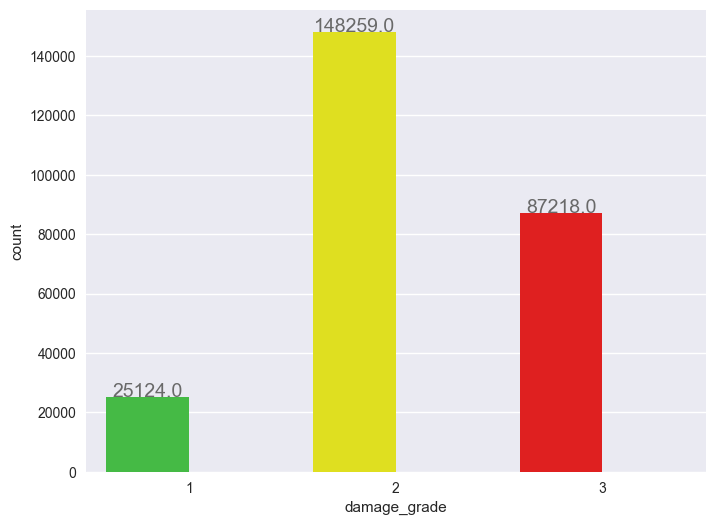

In [15]:
# barplot
plt.figure(figsize=(8, 6))
colors = ["limegreen", "yellow", "red"]
ax = sns.countplot(x="damage_grade", data=train_ds,palette=colors,linewidth=0,edgecolor='black')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x() + 0.2, i.get_height() + 3, str(round(i.get_height(), 2)), fontsize=14, color='dimgrey', ha='center')

bar_width = 0.4  # Adjust the bar width as per your preference
for bar in ax.patches:
    bar.set_width(bar_width)   
plt.show()




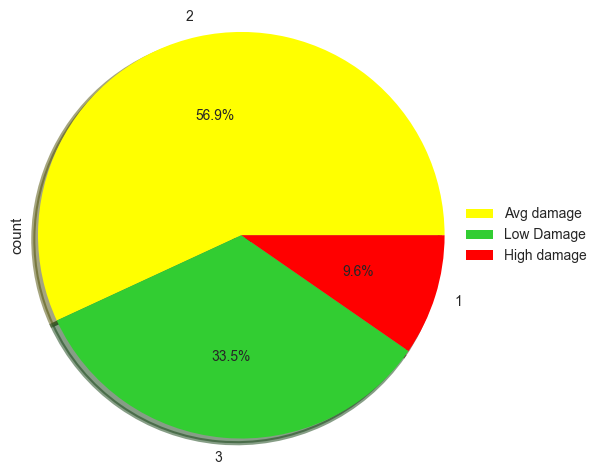

In [16]:
colors = ["yellow","limegreen",  "red"]
train_ds["damage_grade"].value_counts().plot.pie(autopct="%.1f%%",shadow=True,rotatelabels=False,wedgeprops={'linewidth': 3},radius=1.2,colors=colors)
plt.legend(labels=[ "Avg damage", "Low Damage","High damage"], loc="center left", bbox_to_anchor=(1, 0.5))                                                    

plt.show()

 #### OBSERVATIONS
**1**: represents low damage <br>
**2**: represents a medium amount of damage <br>
**3**: represents almost complete destruction <br>
9.61% of bulidings were less damaged by earthquake. <br>
56.9% of bulidings were medium damaged <br>
33.48% of bulidings were highly damaged due to earthquake.

#### Now we will see if the age of the building affect on damage due to earthquake ?

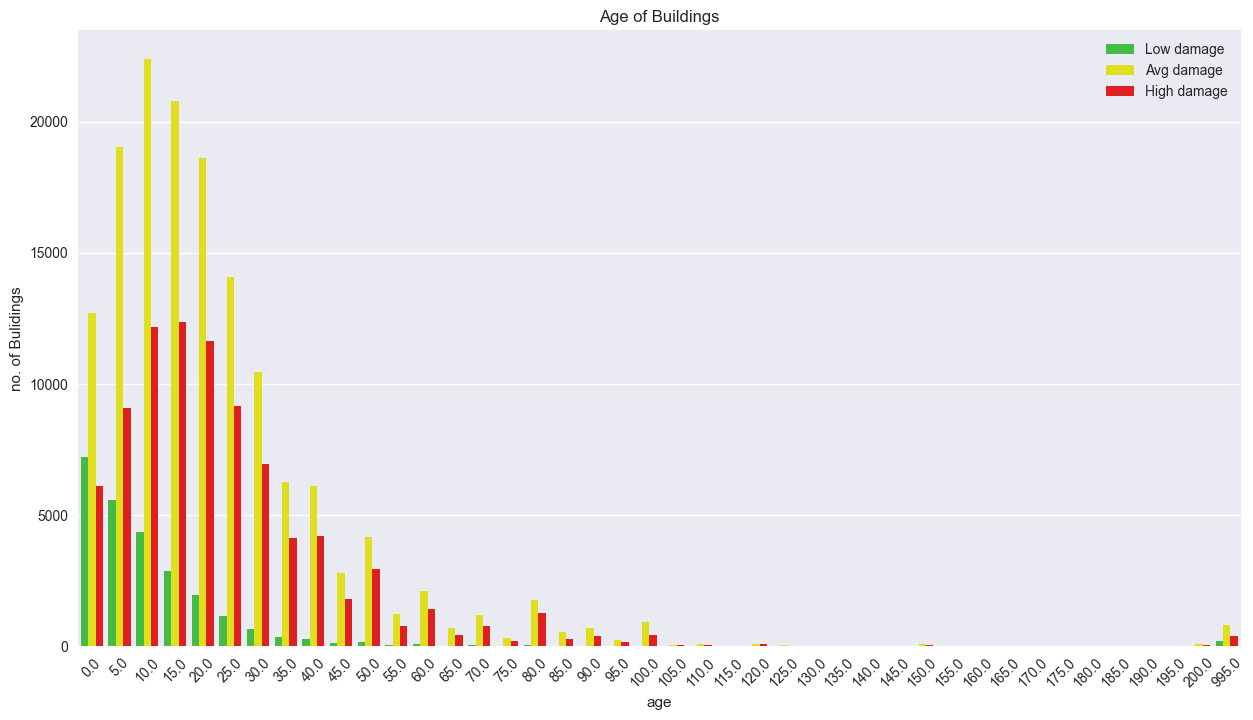

In [17]:
plt.figure(figsize=(15,8))
colors = ["limegreen", "yellow", "red"]
sns.countplot(x=train_ds["age"],hue=train_ds["damage_grade"],palette=colors)
plt.ylabel("no. of Bulidings")
plt.title("Age of Buildings")
plt.legend(["Low damage","Avg damage","High damage"],loc="upper right")
plt.xticks(rotation=45)
plt.show()

## OBSERVATIONS
Age of majority of the bulidings is between 0-50 years,more than 90% of the houses fall under this range.
2nd highest no. of bulidings are in the category high damage.
Hence,The above chart infers that despite the age of building ,most of the time the damage caused to the building is Average damage.

**Does the area of buliding affect on damage caused due to earthquake ?**

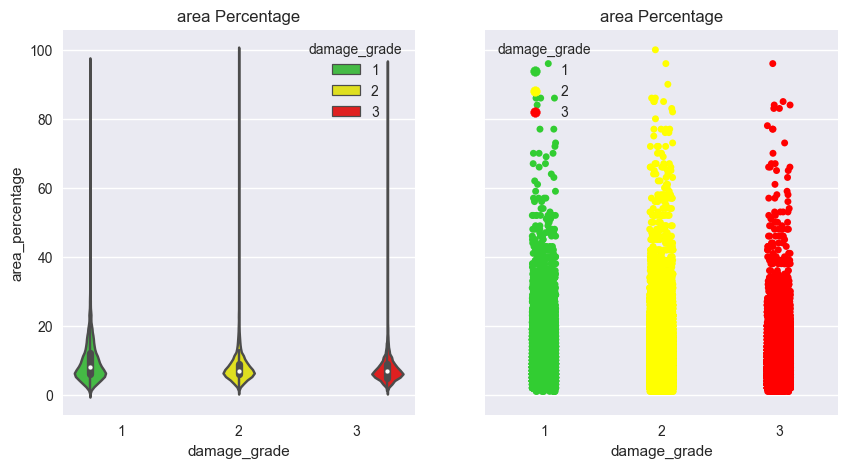

<Figure size 1000x900 with 0 Axes>

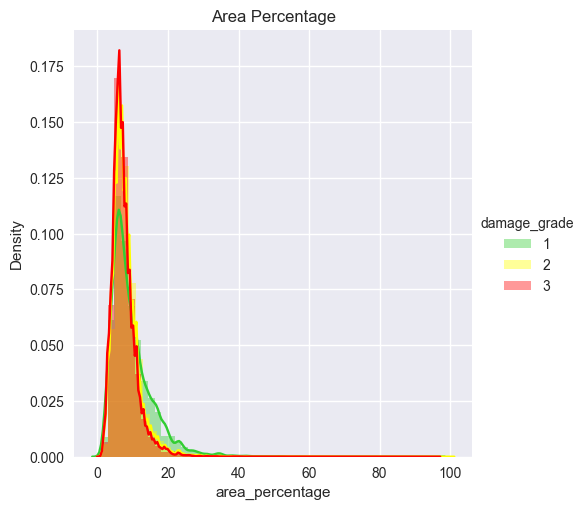

In [18]:
## Violin plot and strip plot
fig,ax=plt.subplots(1,2,figsize=(10,5), sharey=True)
colors=["limegreen", "yellow", "red"]
sns.violinplot(data=train_ds,x='damage_grade',y='area_percentage',hue='damage_grade',palette=colors,split=False,ax=ax[0])

sns.stripplot(data=train_ds,x='damage_grade',y='area_percentage',hue='damage_grade',palette=colors,jitter=True,ax=ax[1])
#plt.ylabel("Company Status",**font)
ax[0].set_title("area Percentage")
ax[1].set_title("area Percentage")
plt.show

###############################################################
#                       Facet Grid                            #
###############################################################
plt.figure(figsize=(10,9))
colors=["limegreen", "yellow", "red"]
sns.FacetGrid(train_ds,hue='damage_grade',height=5,palette=colors)\
    .map(sns.distplot,'area_percentage')\
    .add_legend()
plt.title("Area Percentage")
plt.show()

##### OBSERVATIONS
The above plots infers that as the height of the buliding increases the damaged caused to it also increases.

**Does the height of buliding affect on damage caused due to earthquake ?**

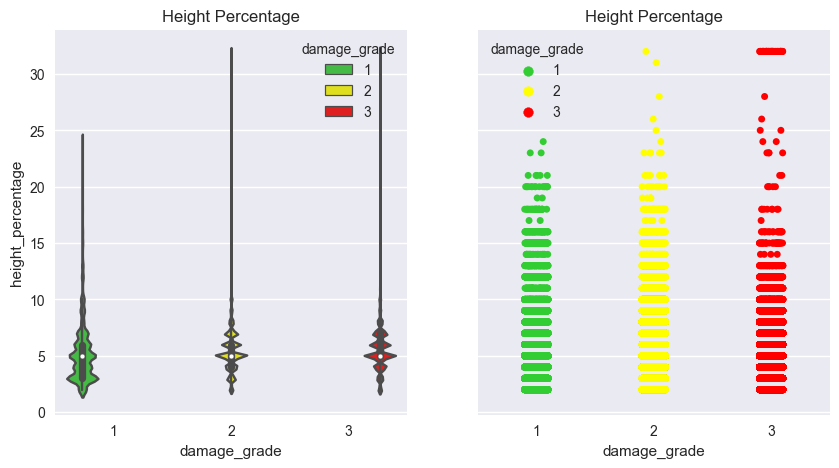

<Figure size 1000x500 with 0 Axes>

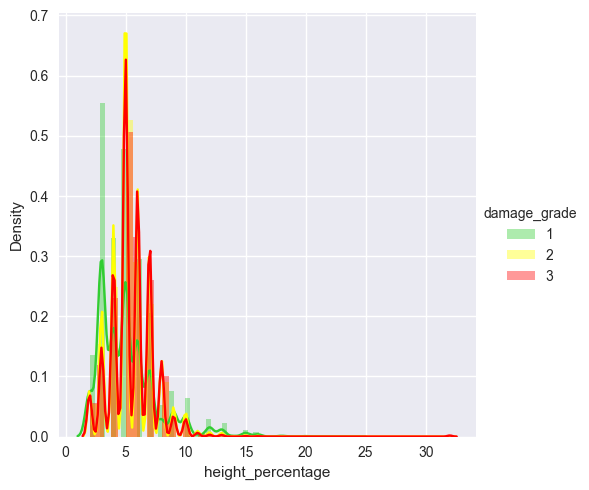

In [19]:
## Violin plot and strip plot
fig,ax=plt.subplots(1,2,figsize=(10,5), sharey=True)
colors=["limegreen", "yellow", "red"]
sns.violinplot(data=train_ds,x='damage_grade',y='height_percentage',hue='damage_grade',palette=colors,
                   split=False,ax=ax[0])

sns.stripplot(data=train_ds,x='damage_grade',y='height_percentage',hue='damage_grade',palette=colors,jitter=True,ax=ax[1])
#plt.ylabel("Company Status",**font)
ax[0].set_title("Height Percentage")
ax[1].set_title("Height Percentage")
plt.show()
###############################################################
#                       Facet Grid                            #
###############################################################

plt.figure(figsize=(10,5))
colors=["limegreen", "yellow", "red"]
sns.FacetGrid(train_ds,hue='damage_grade',height=5,palette=colors)\
    .map(sns.distplot,'height_percentage')\
    .add_legend()
plt.show()

##### OBSERVATIONS
The above plots infers that as the height of the buliding increases the damaged caused to it also increases.

**Do number of floors in the buliding affect on damage caused due to earthquake ?**

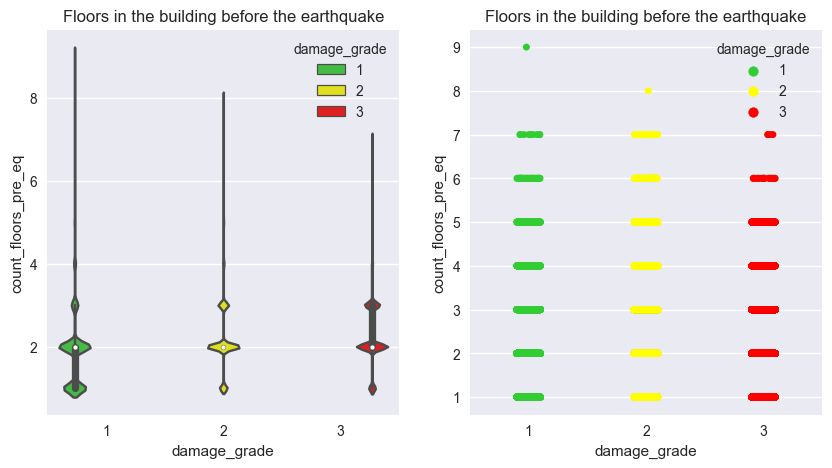

<Figure size 1000x500 with 0 Axes>

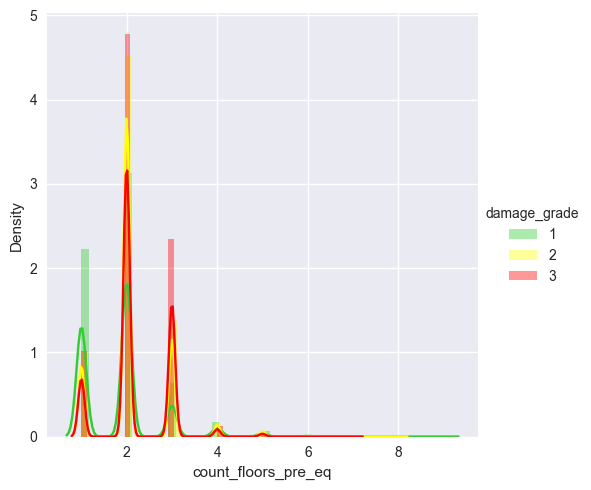

In [20]:
## Violin plot and strip plot
fig,ax=plt.subplots(1,2,figsize=(10,5))
colors=["limegreen", "yellow", "red"]
sns.violinplot(data=train_ds,x='damage_grade',y='count_floors_pre_eq',hue='damage_grade',palette=colors,
                   split=False,ax=ax[0])

sns.stripplot(data=train_ds,x='damage_grade',y='count_floors_pre_eq',hue='damage_grade',palette=colors,jitter=True,ax=ax[1])
#plt.ylabel("Company Status",**font)
ax[0].set_title("Floors in the building before the earthquake")
ax[1].set_title("Floors in the building before the earthquake")
plt.show()
###############################################################
#                       Facet Grid                            #
###############################################################
plt.figure(figsize=(10,5))
colors=["limegreen", "yellow", "red"]
sns.FacetGrid(train_ds,hue='damage_grade',height=5,palette=colors)\
    .map(sns.distplot,'count_floors_pre_eq')\
    .add_legend()
plt.show()

**Families affected due to earthquake ?**


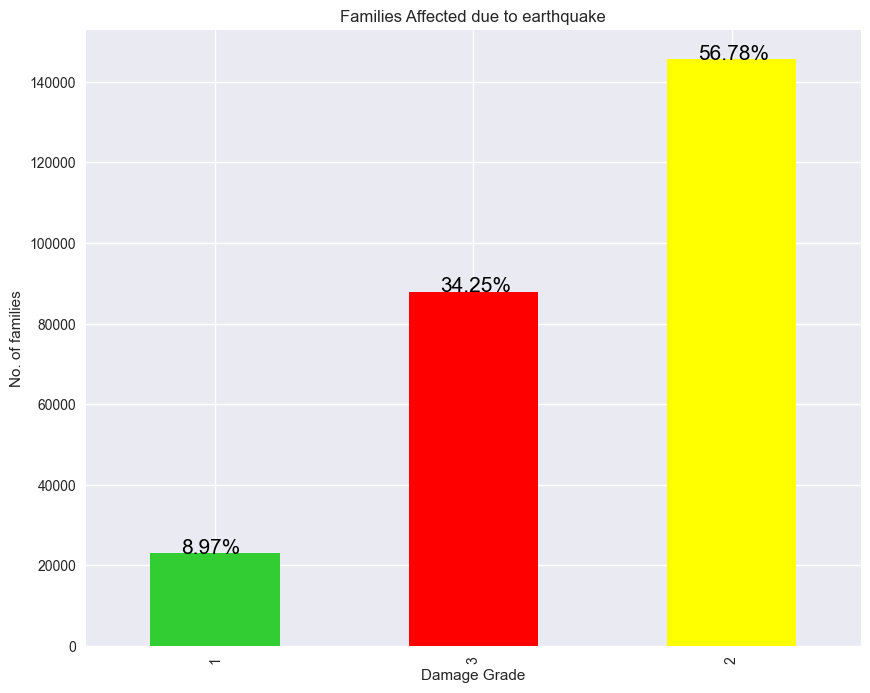

In [21]:
plt.figure(figsize=(10,8))
ax=train_ds.groupby("damage_grade")["count_families"].sum().sort_values().plot.bar(color=["limegreen", "red", "yellow"],
                                                                               )
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()+5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')
plt.title("Families Affected due to earthquake")
plt.ylabel("No. of families")
plt.xlabel("Damage Grade")
plt.show()

##### OBSERVATIONS
34.25% of the families lived in houses which were prone to high damage. Therefore, making them the most exposed group in the population to Critical Health and Financial Damages. <br>
56.78% of the families lived in decent houses but were affected the most in the entire population. <br>
8.97% of the families lived in well built houses which were able to withstand the earthquake.

**Correlation of independent variables with dependant variable ?**

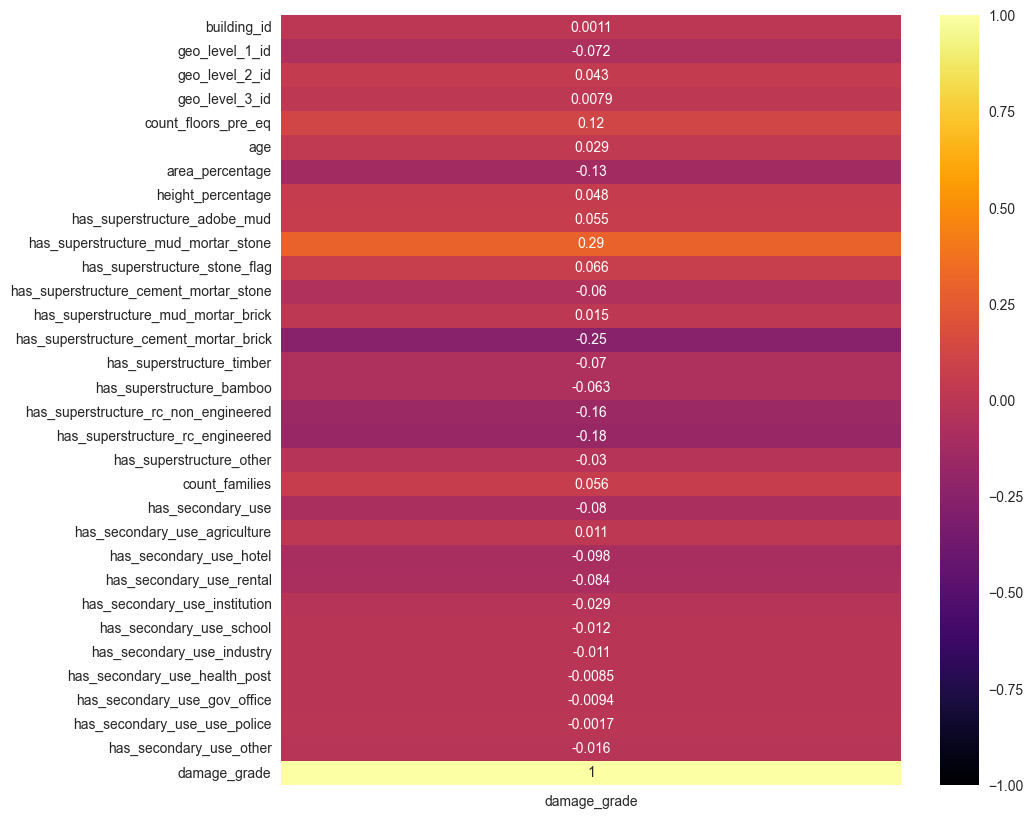

In [22]:
# Assuming 'damage_grade' is the column you want to correlate with other numeric columns
numeric_cols = train_ds.select_dtypes(include='number')
cor = numeric_cols.corr()["damage_grade"]

plt.figure(figsize=(10, 10))
sns.heatmap(cor.to_frame(), annot=True, cmap="inferno",vmin=-1.0,vmax=1.0)
plt.show()


## Check for Outliers

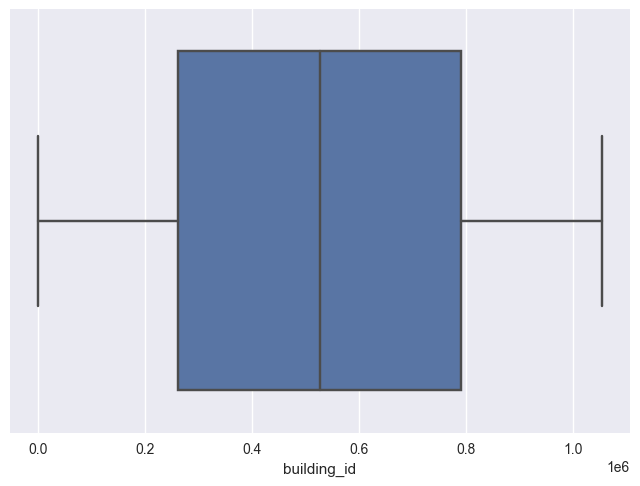

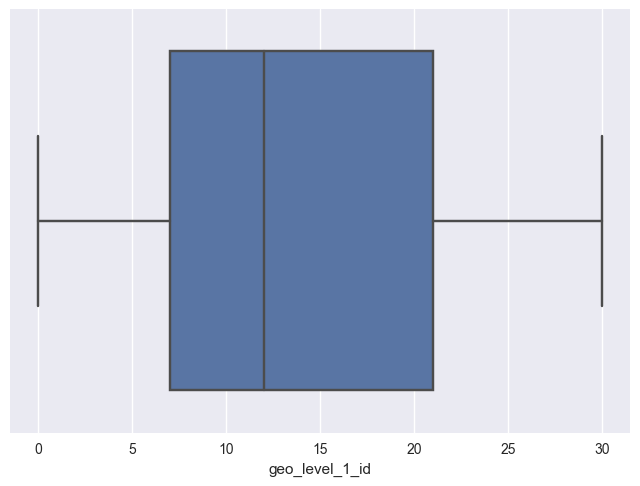

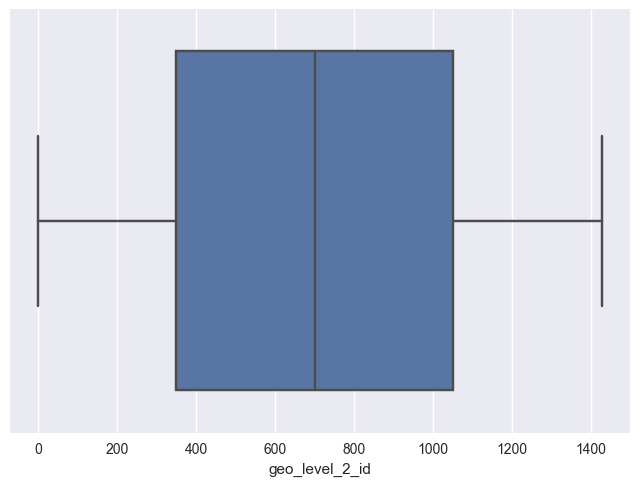

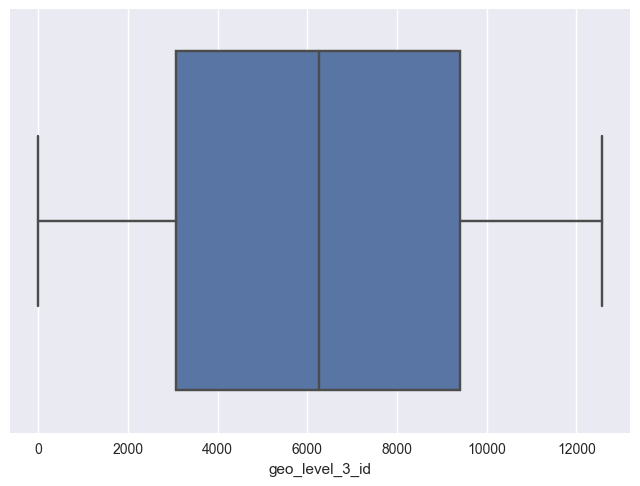

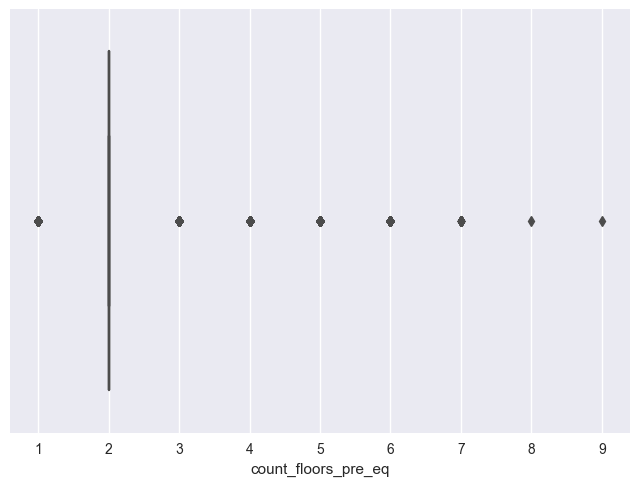

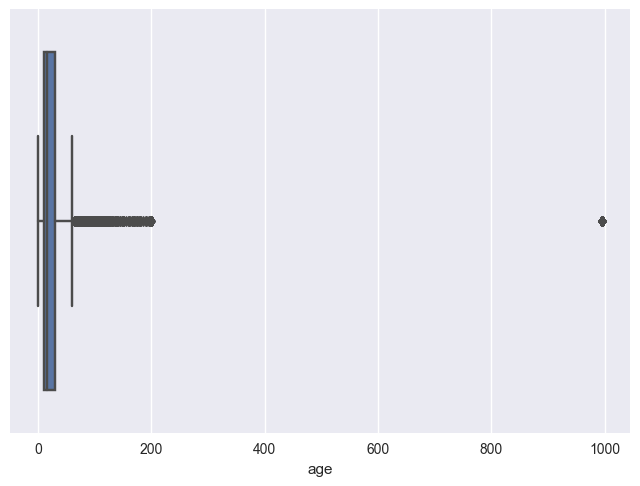

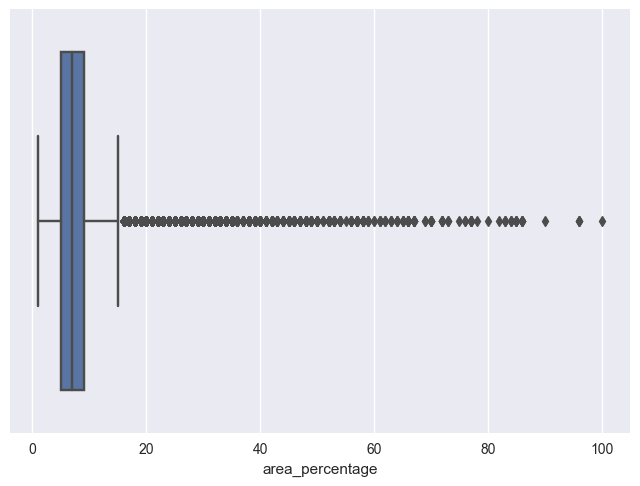

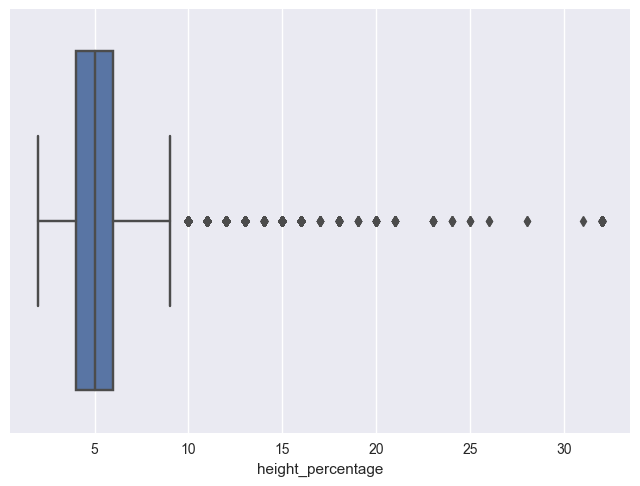

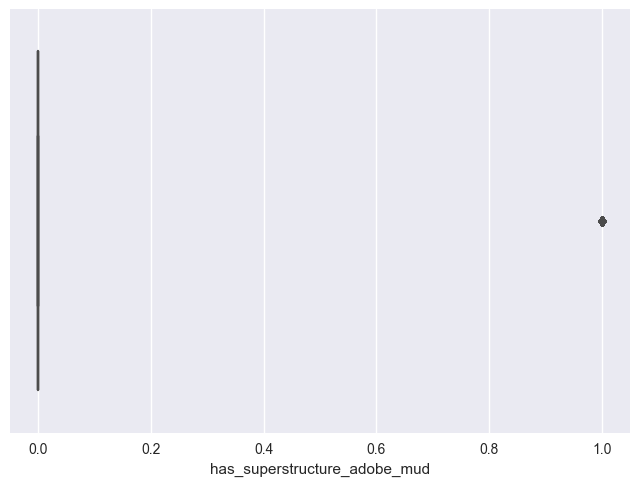

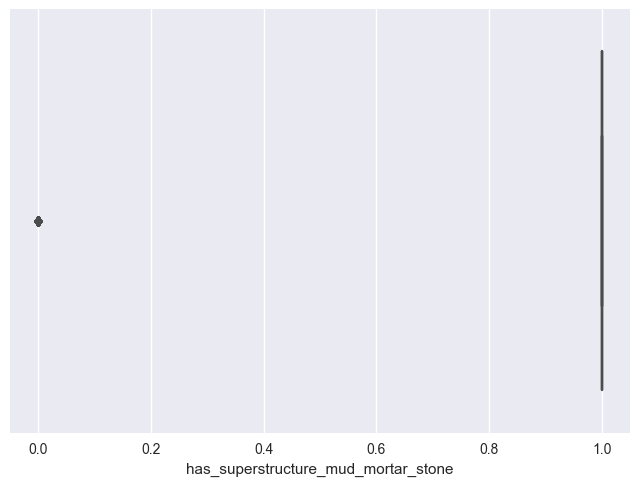

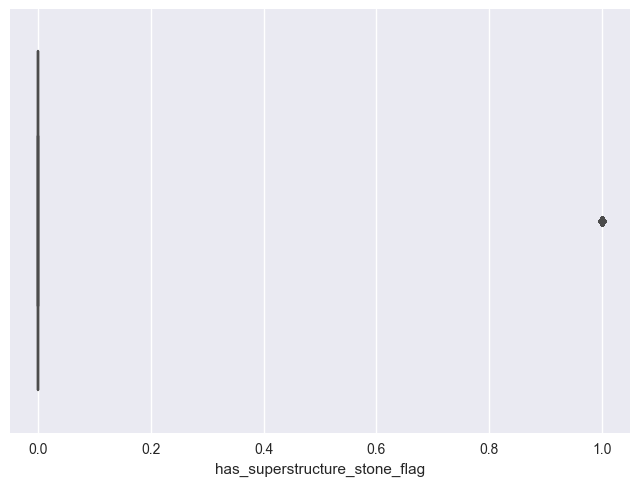

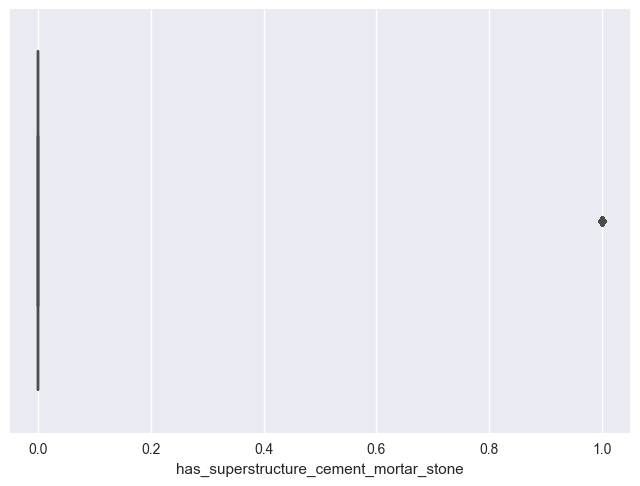

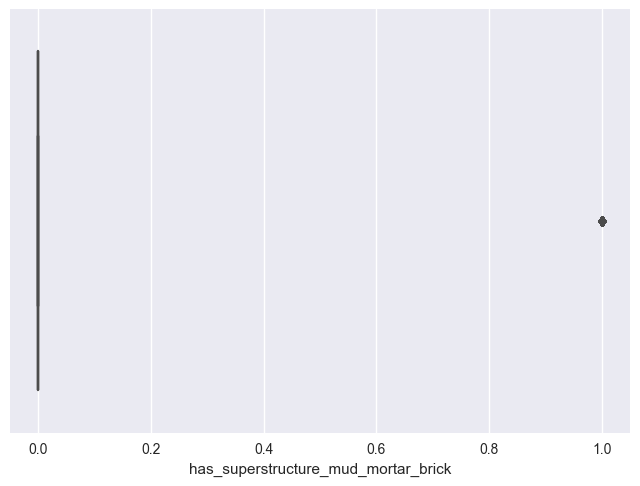

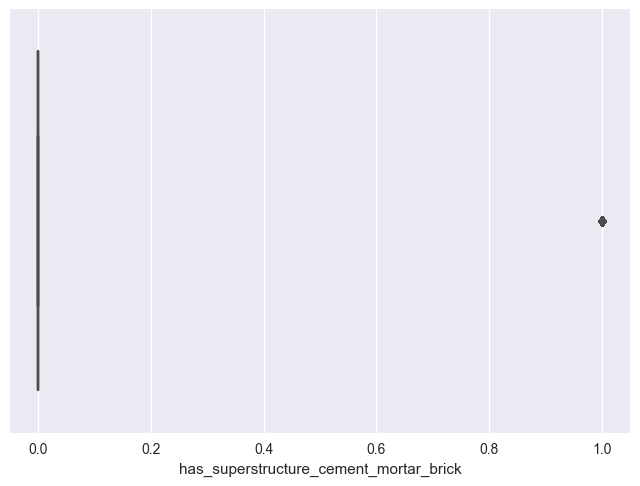

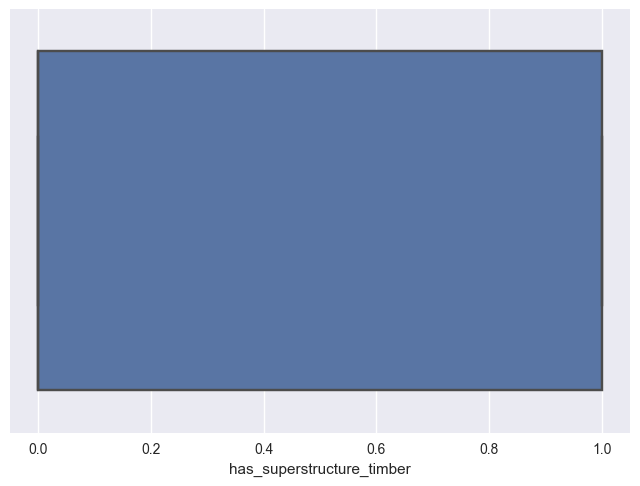

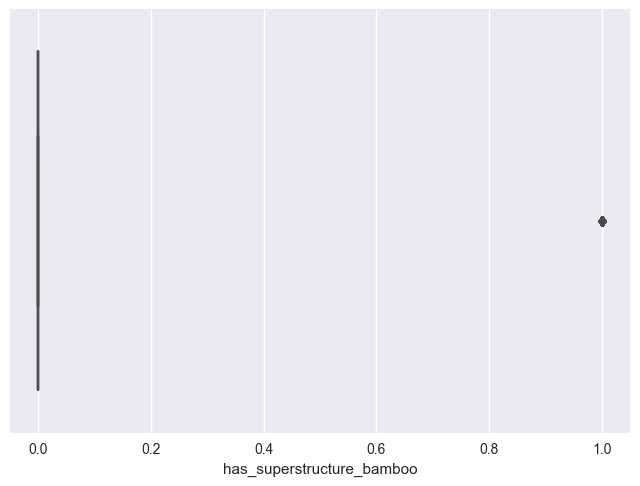

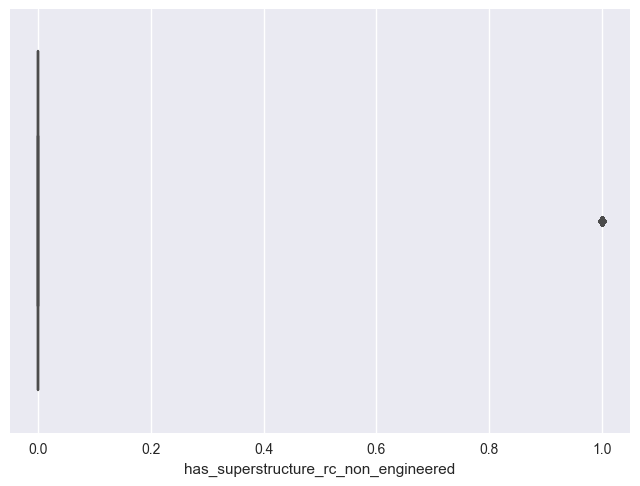

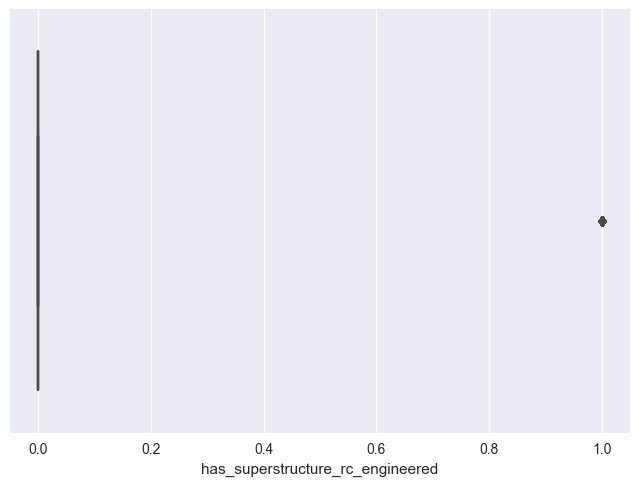

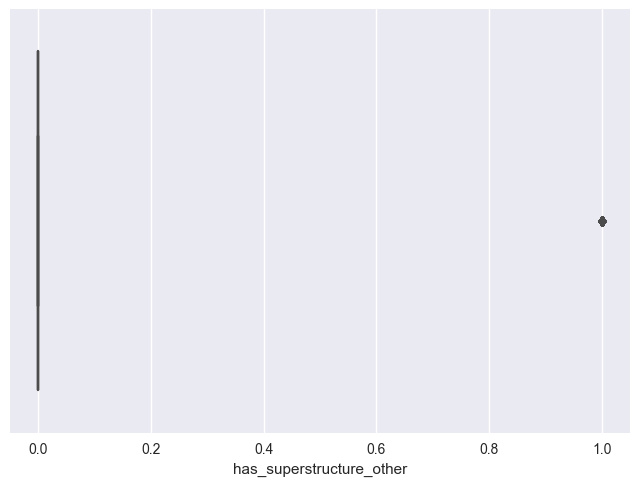

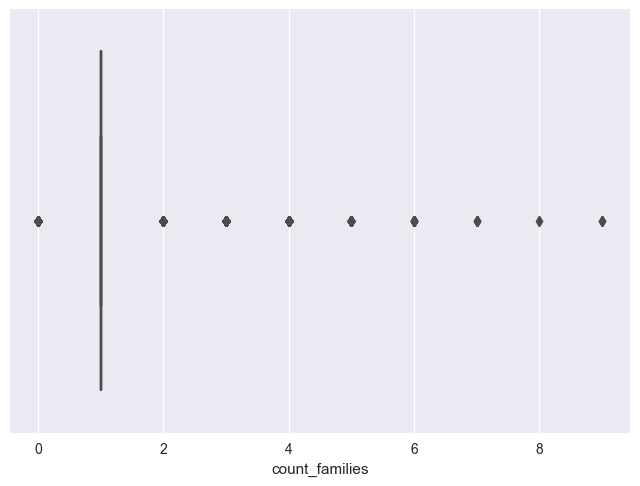

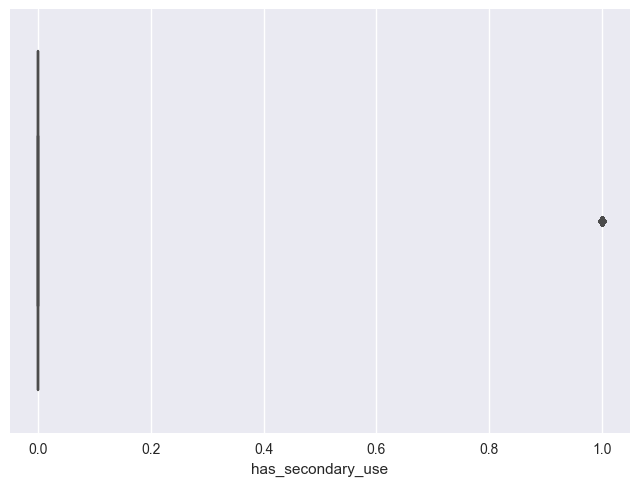

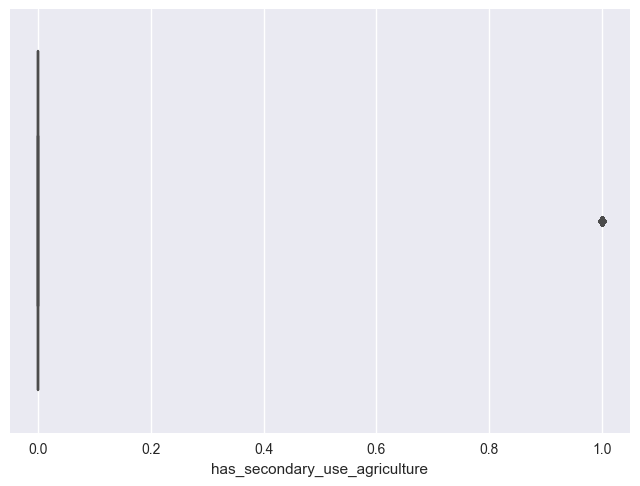

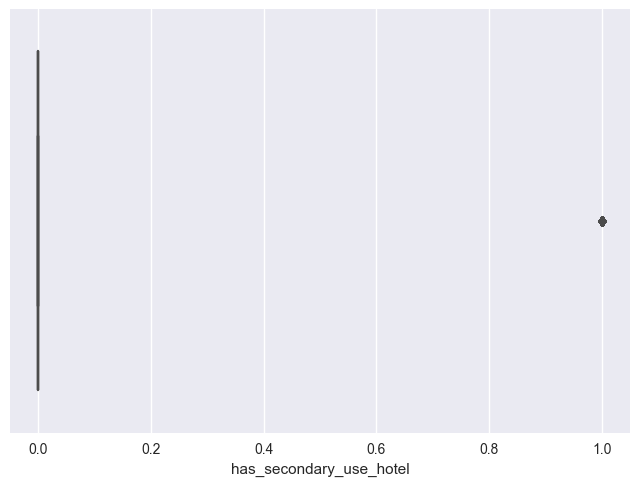

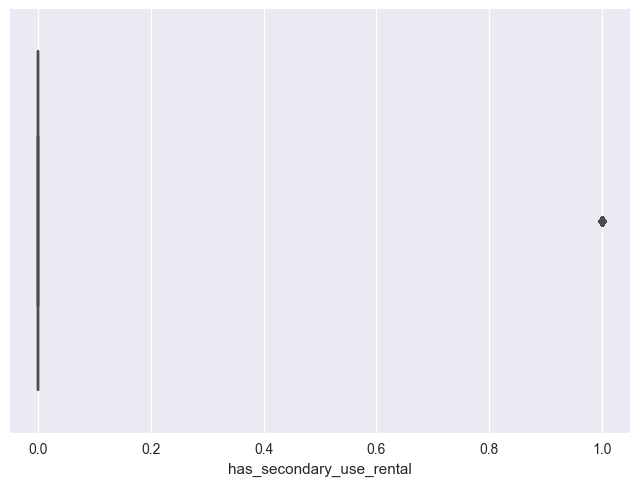

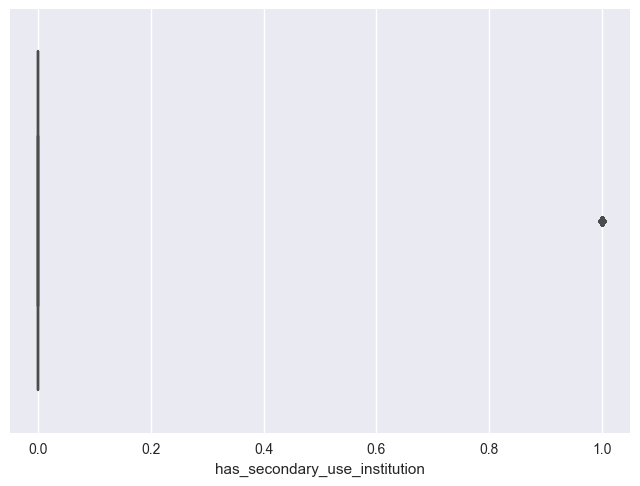

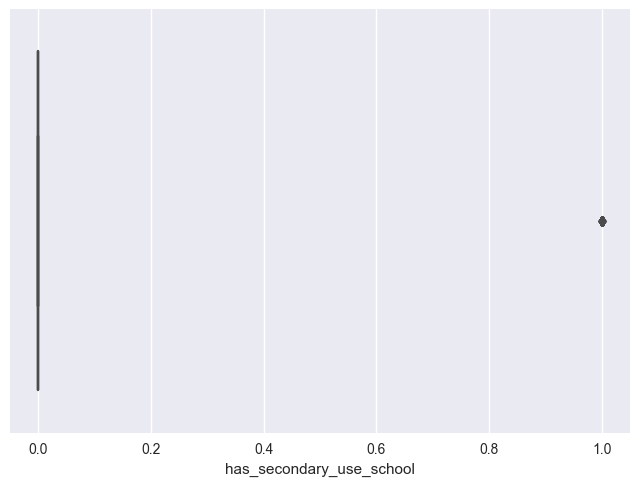

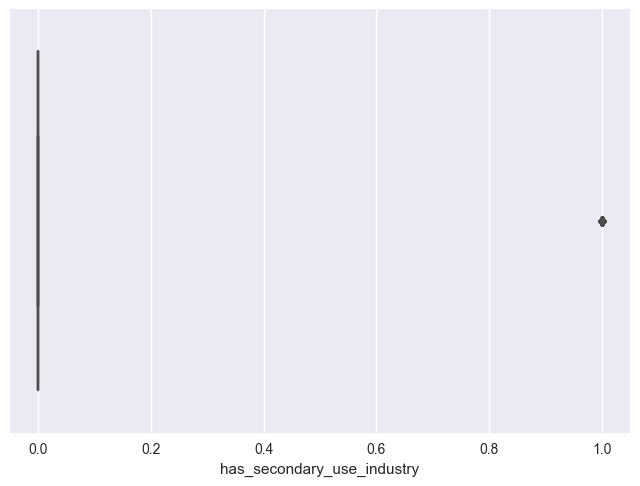

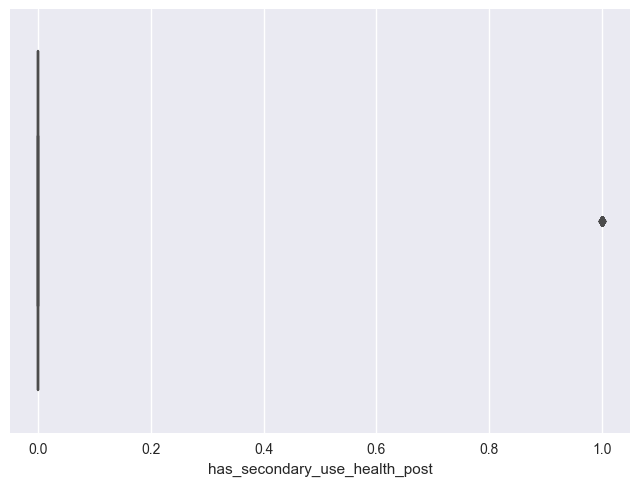

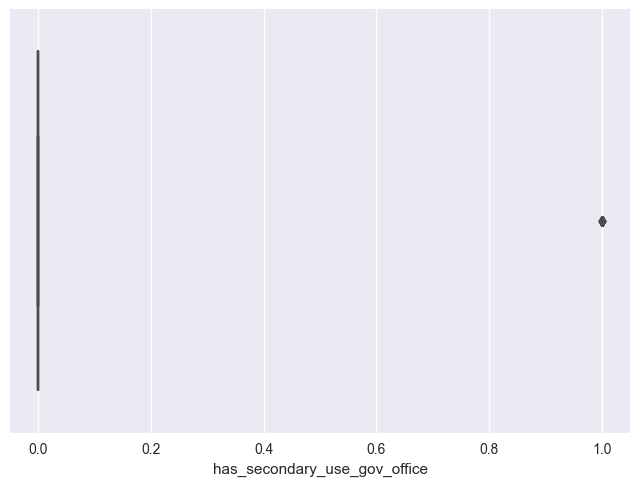

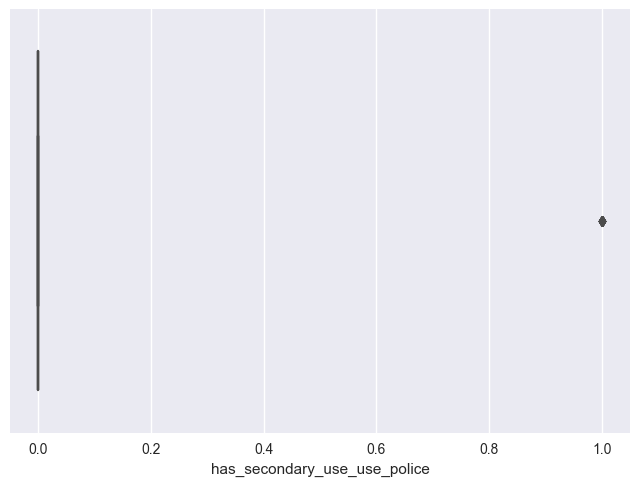

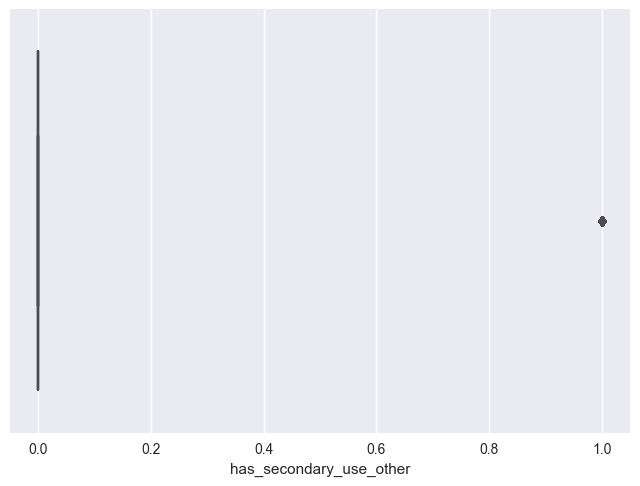

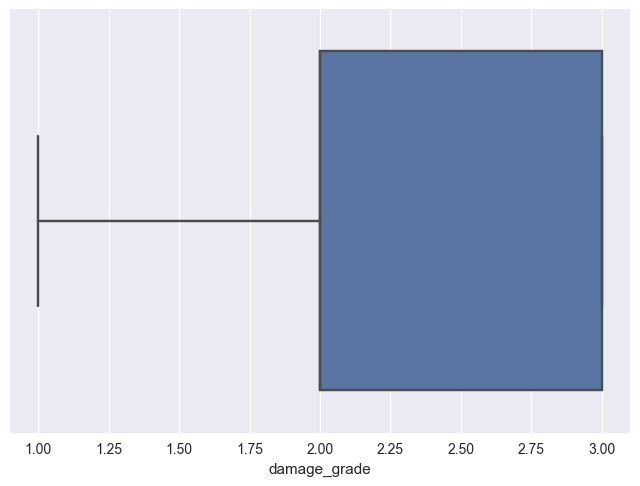

<Figure size 800x550 with 0 Axes>

In [23]:
for i in train_ds.columns:
    if(train_ds[i].dtype=='int64' or train_ds[i].dtype=='float64'):
        sns.boxplot(data=train_ds,x=i)
        plt.figure()

This code contains outliers so remove it

In [24]:
def remove_outliers(col):
    sorted(col)
    q1,q3 = col.quantile([0.25,0.75])
    IQR = q3-q1
    low = q1-(1.5*IQR)
    high = q3+(1.5*IQR)
    return low,high

<Axes: xlabel='height_percentage'>

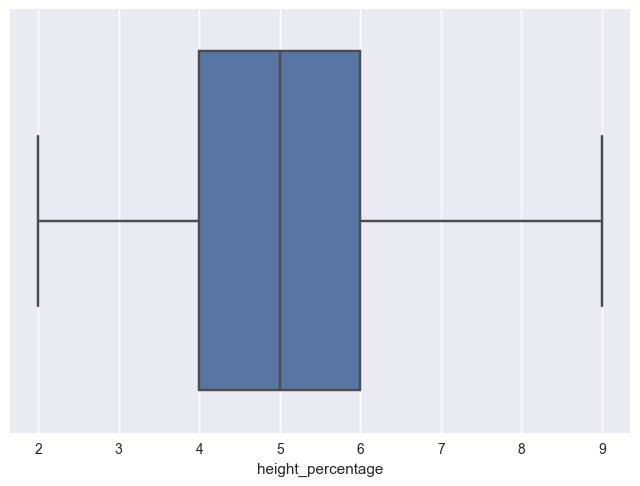

In [25]:
low,high = remove_outliers(train_ds['height_percentage'])
train_ds['height_percentage'] = np.where(train_ds['height_percentage']<low,low,train_ds['height_percentage'])
train_ds['height_percentage'] = np.where(train_ds['height_percentage']>high,high,train_ds['height_percentage'])
sns.boxplot(train_ds,x='height_percentage')


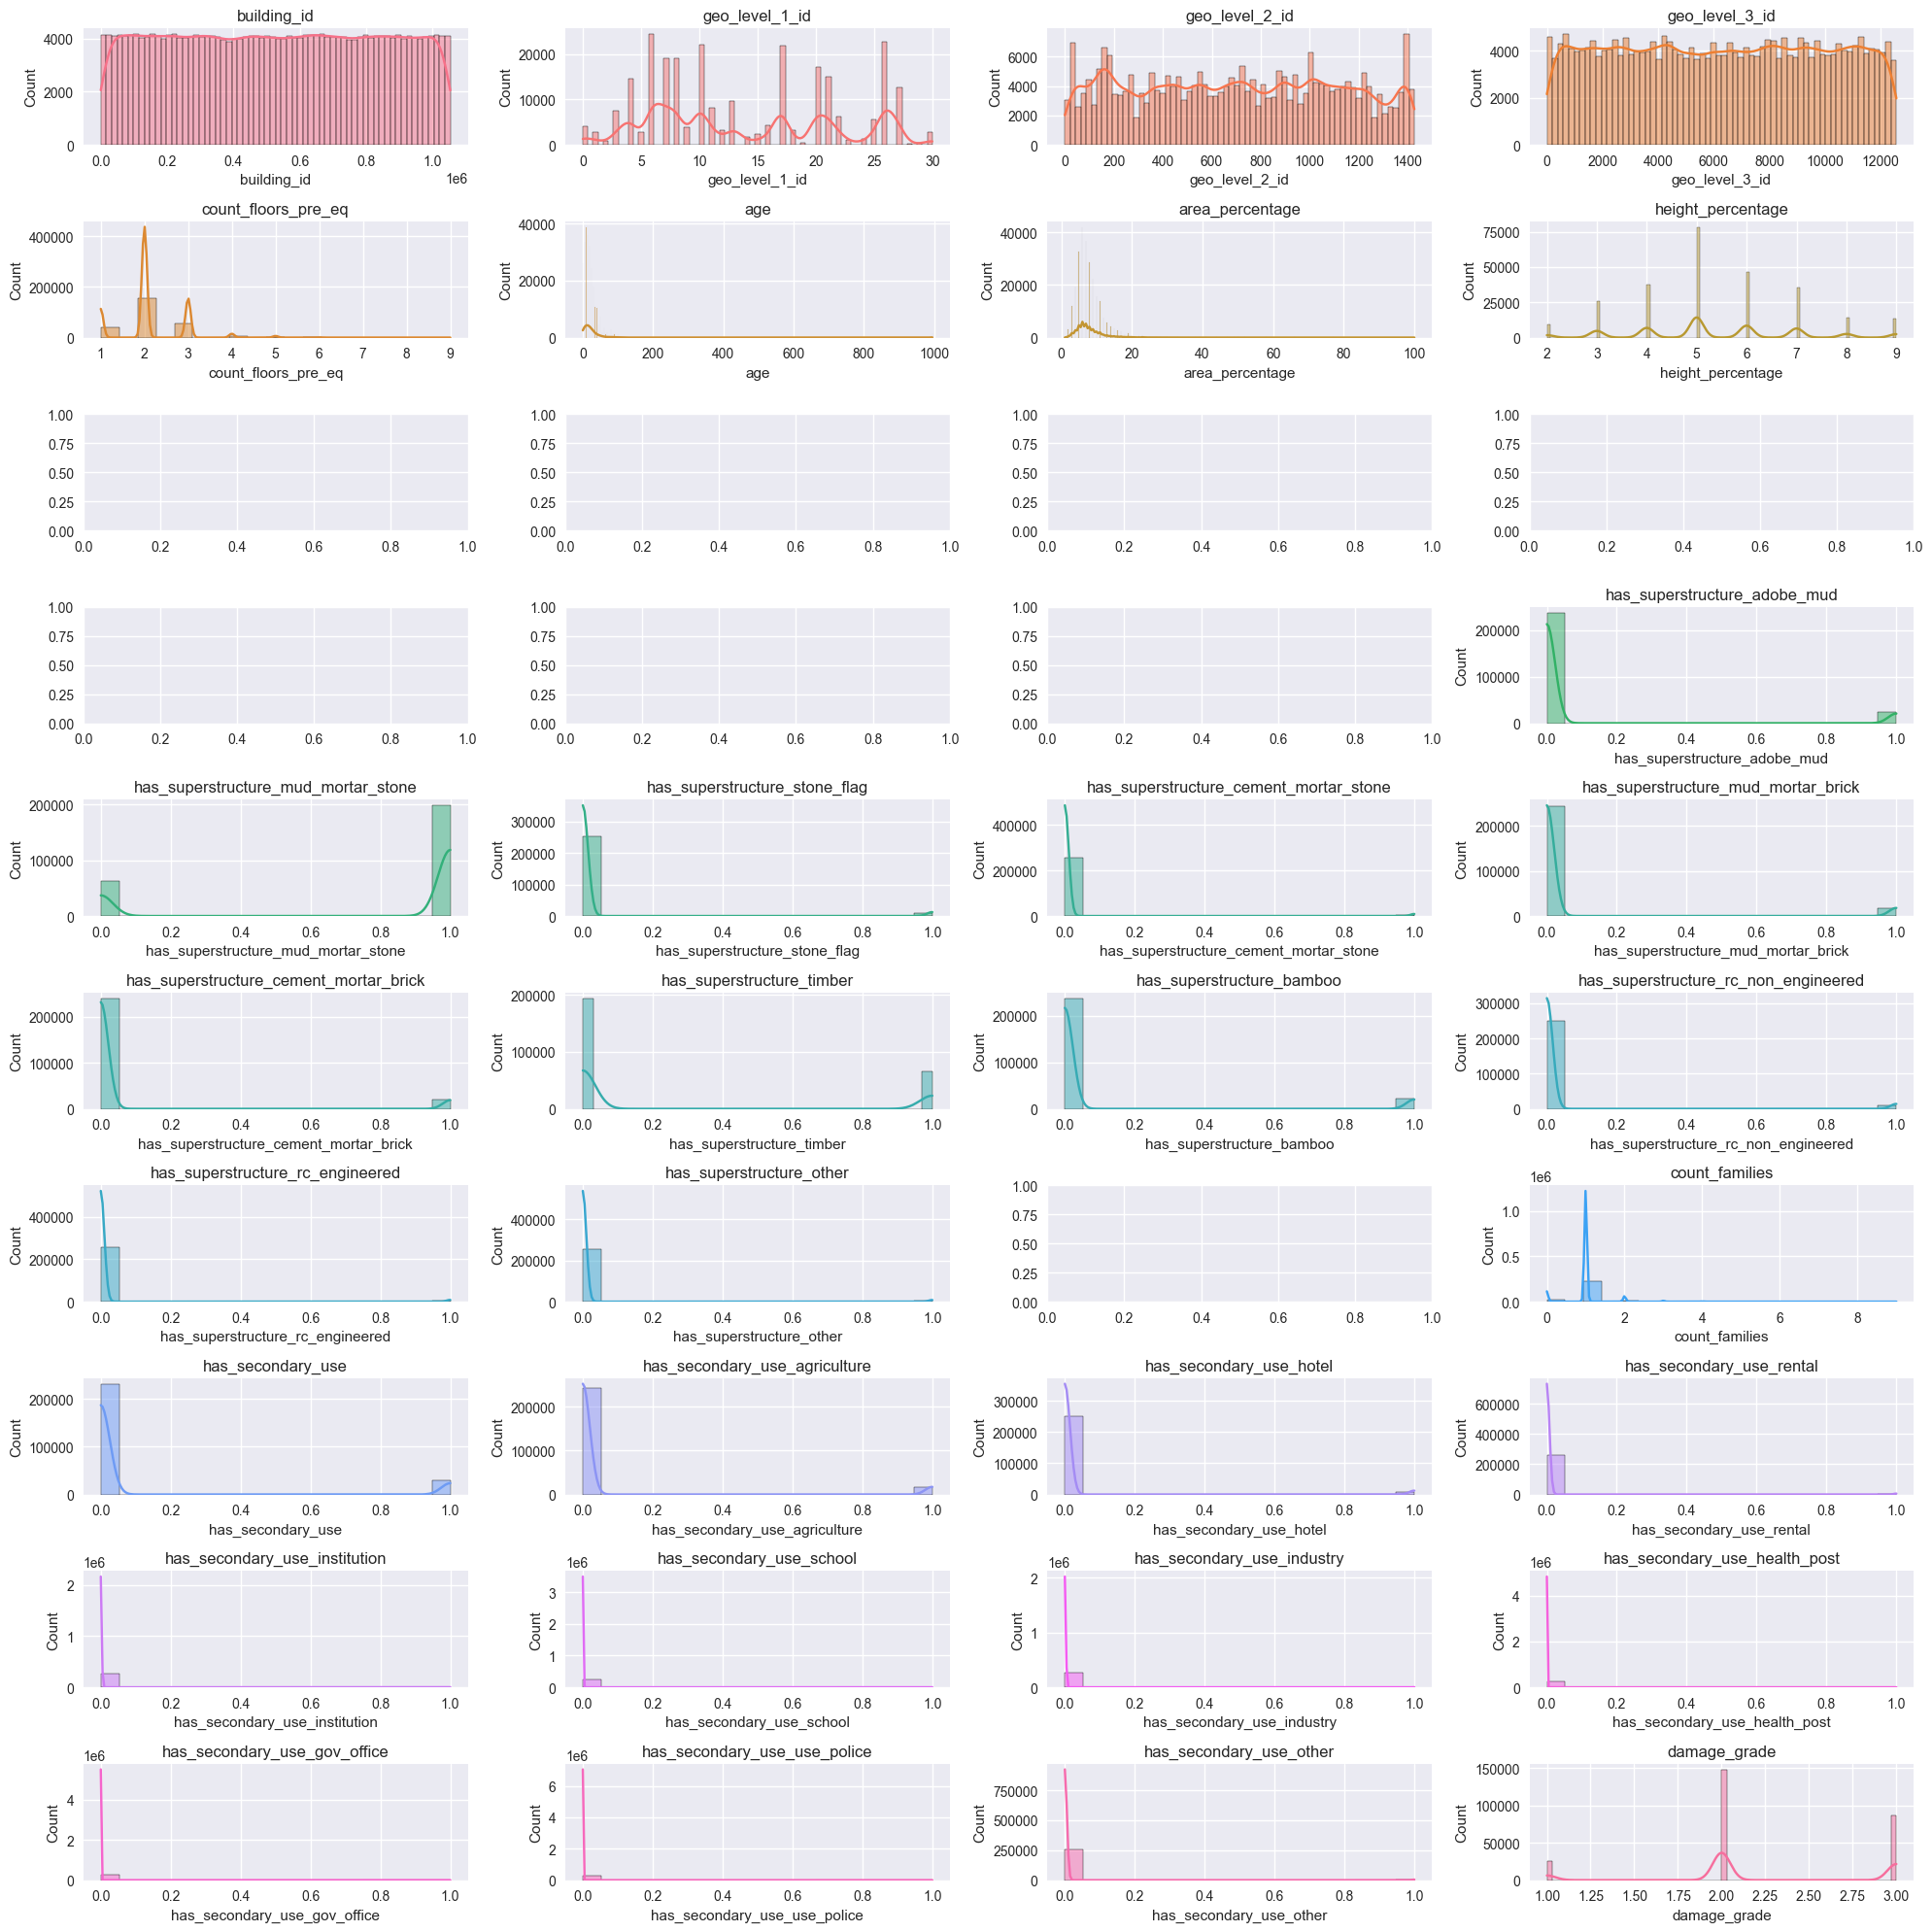

In [26]:
## Histplot
num_columns = train_ds.shape[1]
num_rows = 10
num_cols = 4
# Define a list of colors
colors = sns.color_palette('husl', num_columns)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))
for i, column in enumerate(train_ds.columns):
    if train_ds[column].dtype=='int64' or train_ds[column].dtype=='float64':
        ax = axes[i // num_cols, i % num_cols]
        sns.histplot(data=train_ds, x=column, kde=True, color=colors[i], line_kws={'color': 'black'}, ax=ax)
        ax.set_title(column)

plt.tight_layout()
plt.show()

## Model Building

In [27]:
import time

## 1. check whether 'building_id' is dropped in train_ds and labels_ds
## 2. drop damage_grade in train_ds

In [28]:
labels_ds.sample(10)

,building_id,damage_grade
135763,812815,2
54191,773306,3
22377,615891,3
81084,86648,2
68323,900852,3
7193,464637,2
33585,526547,3
79092,943552,2
81091,960671,2
7389,976473,3


In [29]:
train_ds.drop(columns=['damage_grade','building_id'],inplace=True)
labels_ds.drop(columns=['building_id'],inplace=True)

In [30]:
train_ds = pd.get_dummies(train_ds, drop_first = True)

In [31]:
train_ds.dtypes

geo_level_1_id                              int64
geo_level_2_id                            float64
geo_level_3_id                            float64
count_floors_pre_eq                       float64
age                                       float64
area_percentage                             int64
height_percentage                         float64
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_mud_mortar_brick         int64
has_superstructure_cement_mortar_brick      int64
has_superstructure_timber                   int64
has_superstructure_bamboo                   int64
has_superstructure_rc_non_engineered        int64
has_superstructure_rc_engineered            int64
has_superstructure_other                    int64
count_families                              int64
has_secondary_use                           int64


In [32]:
X = train_ds
y = labels_ds
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Random Forest Classifier

In [33]:

#Random Forest
rf = RandomForestClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)
start_time = time.time()
model = rf.fit(X_train, y_train)
rf_time_fit = time.time() - start_time

#Predictions - Decision Tree
start_time = time.time()
predictions=model.predict(X_test)
rf_time_pred = time.time() - start_time

print("Random Forest")
print("Fit Time: {} seconds".format(rf_time_fit))
print("Prediction Time: {} seconds".format(rf_time_pred))
print("Training Score: {}".format(rf.score(X_train, y_train)))
print("Test Score: {}".format(rf.score(X_test, y_test)))


Random Forest
Fit Time: 184.13864493370056 seconds
Prediction Time: 6.004087924957275 seconds
Training Score: 0.7551563699155794
Test Score: 0.7308186719364556


## Decision Tree Classifier

In [34]:
dt = DecisionTreeClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)
start_time = time.time()
model = dt.fit(X_train, y_train)
dt_time_fit = time.time() - start_time

#Predictions - Decision Tree
start_time = time.time()
model.predict(X_test)
dt_time_pred = time.time() - start_time
print("Decision Tree")
print("Fit Time: {} seconds".format(dt_time_fit))
print("Prediction Time: {} seconds".format(dt_time_pred))
print("Training Score: {}".format(dt.score(X_train, y_train)))
print("Test Score: {}".format(dt.score(X_test, y_test)))
print("----------------------------------------")

Decision Tree
Fit Time: 2.485063314437866 seconds
Prediction Time: 0.028237581253051758 seconds
Training Score: 0.7485370299309286
Test Score: 0.71616047274611
----------------------------------------


## Bagging Classifier

In [35]:
# Bagging Classifier
bagging = BaggingClassifier(n_estimators=50,max_samples=0.1,random_state=0)
start_time = time.time()
model_6 = bagging.fit(X_train, y_train)
bagging_time_fit = time.time() - start_time

# Predictions - Bagging Classifier
start_time = time.time()
model_6.predict(X_test)
bagging_time_pred = time.time() - start_time
print("Bagging Classifier")
print("Fit Time: {} seconds".format(bagging_time_fit))
print("Prediction Time: {} seconds".format(bagging_time_pred))
print("Training Score: {}".format(bagging.score(X_train, y_train)))
print("Test Score: {}".format(bagging.score(X_test, y_test)))
print("----------------------------------------")

Bagging Classifier
Fit Time: 26.923693418502808 seconds
Prediction Time: 1.7902121543884277 seconds
Training Score: 0.7810149654643131
Test Score: 0.7303390188215882
----------------------------------------


In [36]:
from sklearn.metrics import accuracy_score
prediction_score = accuracy_score(y_test, predictions)
print("Prediction Score (Accuracy): {:.2f}%".format(prediction_score * 100))

Prediction Score (Accuracy): 73.08%


In [37]:
from joblib import dump
import os

In [38]:
dump(model, r'C:\Users\Ankit Kumar\anaconda3\capstone1\savedModels\Capstone_Project_model.joblib')

['C:\\Users\\Ankit Kumar\\anaconda3\\capstone1\\savedModels\\Capstone_Project_model.joblib']

In [39]:
rf_scores = {
    'Model': 'Random Forest',
    'Fit Time (seconds)': rf_time_fit,
    'Prediction Time (seconds)': rf_time_pred,
    'Training Score': rf.score(X_train, y_train),
    'Test Score': rf.score(X_test, y_test)
}
dt_scores = {
    'Model': 'Decision Tree',
    'Fit Time (seconds)': dt_time_fit,
    'Prediction Time (seconds)': dt_time_pred,
    'Training Score': dt.score(X_train, y_train),
    'Test Score': dt.score(X_test, y_test)
}
bagging_scores = {
    'Model': 'Bagging Classifier',
    'Fit Time (seconds)': bagging_time_fit,
    'Prediction Time (seconds)': bagging_time_pred,
    'Training Score': bagging.score(X_train, y_train),
    'Test Score': bagging.score(X_test, y_test)
}

# Create a DataFrame to display the scores
scores_df = pd.DataFrame([dt_scores, rf_scores, bagging_scores])

# Display the scores table
scores_df

,Model,Fit Time (seconds),Prediction Time (seconds),Training Score,Test Score
0,Decision Tree,2.485063,0.028238,0.748537,0.716160
1,Random Forest,184.138645,6.004088,0.755156,0.730819
2,Bagging Classifier,26.923693,1.790212,0.781015,0.730339


In [40]:
X.columns


Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'land_surface_condition_o',
       'land

In [41]:
print('Target variable in features:', 'damage_grade' in X_train.columns)

Target variable in features: False
